## Imports and Packages

In [2]:
## Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
## Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers
## Preprocessing and ML related libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [3]:
df = pd.read_csv('insurance_claim_data.csv')
df

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(5000, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   float64
 13  SpecialFixes                4879 

In [6]:
## Obtaining a dataframe to only get the numerical features
df_num = df.select_dtypes(include=['int64', 'float64'])

In [7]:
df_num.agg(['min', 'max'])

,SettlementValue,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,SpecialMedications,SpecialAssetDamage,...,SpecialFixes,GeneralFixed,GeneralUplift,SpecialLoanerVehicle,SpecialTripCosts,SpecialJourneyExpenses,SpecialTherapy,Vehicle Age,Driver Age,Number of Passengers
min,240.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.0,240.0,0.0,0.00,0.0,0.0,0.0,0.0,18.0,1.0
max,7862.9,3024.0,0.0,1250.0,3912.64,889.0,7735.58,1050.0,30.25,6070.0,...,4000.0,4345.0,1430.0,4408.16,254.2,880.0,1225.0,19.0,79.0,4.0


In [8]:
df_num.describe()

,SettlementValue,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,SpecialMedications,SpecialAssetDamage,...,SpecialFixes,GeneralFixed,GeneralUplift,SpecialLoanerVehicle,SpecialTripCosts,SpecialJourneyExpenses,SpecialTherapy,Vehicle Age,Driver Age,Number of Passengers
count,4894.000000,4870.000000,4879.0,4883.000000,4872.000000,4866.000000,4872.000000,4870.000000,4870.000000,4889.000000,...,4879.000000,4879.000000,4863.000000,4861.000000,4885.000000,4853.000000,4868.000000,4874.000000,4871.000000,4878.000000
mean,1218.010685,3.611704,0.0,13.363580,463.305386,0.283580,52.191115,9.108830,0.109698,33.460761,...,3.942209,687.509736,10.407465,7.719720,1.959881,11.639120,183.600286,9.508617,48.789160,2.482370
std,858.866309,85.047845,0.0,84.223612,766.187669,12.988075,392.909130,65.505181,1.389916,282.692529,...,116.335053,399.361279,50.165743,141.155658,13.117419,49.086924,223.885780,5.727625,17.819725,1.109911
min,240.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000
25%,669.140000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,33.000000,1.000000
50%,988.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,50.000000,10.000000,49.000000,2.000000
75%,1510.000000,0.000000,0.0,0.000000,906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,895.000000,0.000000,0.000000,0.000000,0.000000,350.000000,14.000000,64.000000,3.000000
max,7862.900000,3024.000000,0.0,1250.000000,3912.640000,889.000000,7735.580000,1050.000000,30.250000,6070.000000,...,4000.000000,4345.000000,1430.000000,4408.160000,254.200000,880.000000,1225.000000,19.000000,79.000000,4.000000


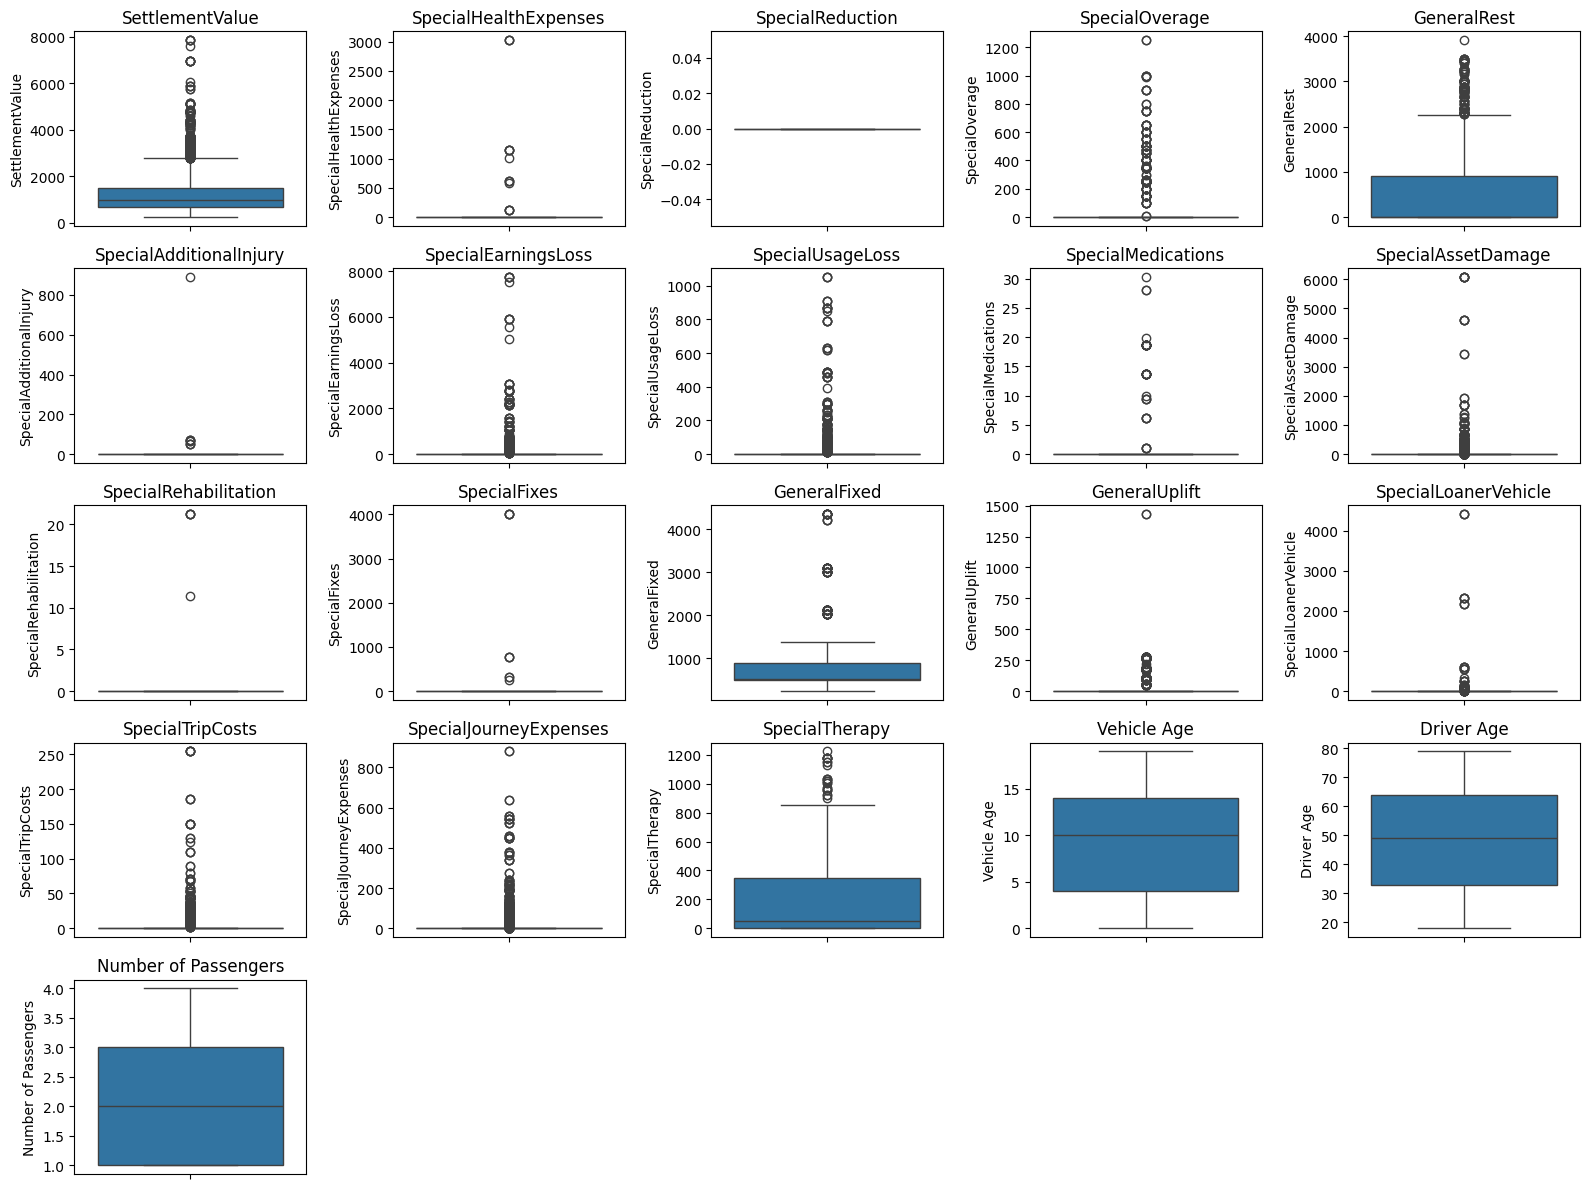

In [9]:
plt.figure(figsize=(16, 12))

# Loop through each numerical feature
for i, col in enumerate(df_num.columns, 1):
    plt.subplot(5, 5, i)  # Adjust rows/columns based on the number of features
    sns.boxplot(y=df_num[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

### Studying The Target Variable

In [10]:
## Finding out how many Null Settlement Values there are
## Important in considering how to deal with the Null instances as SettlementValue is the target variable
df.loc[df['SettlementValue'].isnull()]

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
64,NaN,Rear end,G. 7 months,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,2020-06-29 04:48:03.456691,2020-07-24 04:48:03.456691,NaN,76.0,NaN,Hit a deer on the highway.,Minor cuts and scrapes.,No,No,Female
109,NaN,Rear end,H. 8 months,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,2023-05-30 22:06:30.318063,2024-01-18 22:06:30.318063,13.0,59.0,1.0,Rear-ended at a stoplight.,Sprained ankle and wrist.,No,No,Female
137,NaN,Rear end,F. 6 months,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,2023-03-22 02:51:40.940188,2023-07-13 02:51:40.940188,4.0,24.0,3.0,Hit a deer on the highway.,Whiplash and minor bruises.,Yes,No,Male
216,NaN,Rear end,A. 1 month,0.0,0.0,0.0,788.0,0.0,0.0,30.0,...,2023-03-26 12:00:08.641728,2023-11-04 12:00:08.641728,1.0,79.0,2.0,Hit a deer on the highway.,Concussion and bruised ribs.,Yes,Yes,Female
228,NaN,Rear end,F. 6 months,NaN,0.0,0.0,NaN,0.0,0.0,0.0,...,2020-09-24 12:36:43.640728,2020-11-08 12:36:43.640728,4.0,20.0,4.0,Hit a deer on the highway.,Fractured arm and leg.,No,Yes,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,NaN,Other,F. 6 months,0.0,0.0,0.0,2090.0,0.0,0.0,NaN,...,2023-05-31 12:07:38.011602,2024-02-08 12:07:38.011602,17.0,61.0,4.0,NaN,Whiplash and minor bruises.,No,No,Other
4882,NaN,Rear end,F. 6 months,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-25 05:46:49.281856,2020-06-05 05:46:49.281856,10.0,39.0,2.0,Lost control on a snowy road.,NaN,Yes,No,Other
4899,NaN,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2021-01-23 20:01:29.297859,7.0,55.0,1.0,Rear-ended at a stoplight.,NaN,No,No,Male
4917,NaN,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2023-02-09 05:32:42.392478,2024-01-08 05:32:42.392478,17.0,18.0,NaN,Rear-ended at a stoplight.,NaN,No,No,Other


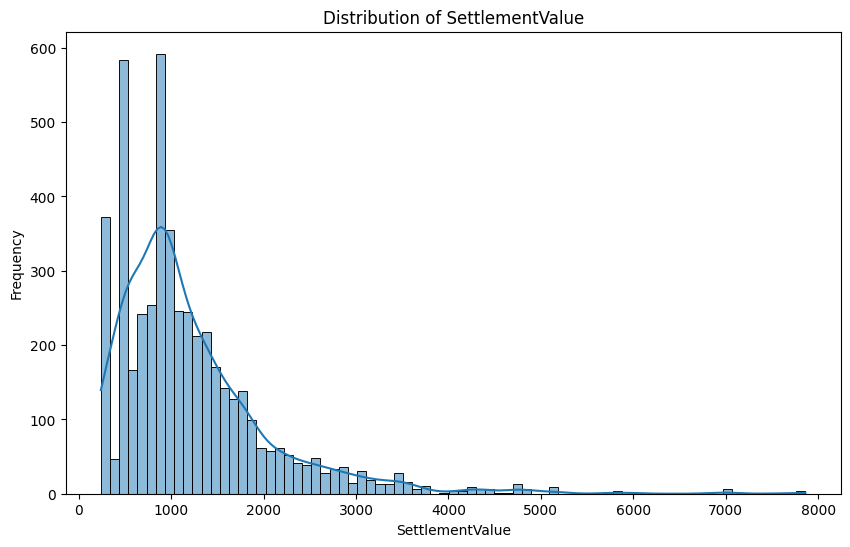

In [11]:
## From this plot we can see what is the Distribution of SettlementValue using a Barplot
plt.figure(figsize=(10,6))
sns.histplot(df['SettlementValue'],kde = True)
plt.title('Distribution of SettlementValue')
plt.xlabel('SettlementValue')
plt.ylabel('Frequency')
plt.show()

In [12]:
## Find out the Min,Max and Mean SettlementValue
print("Minimum SettlementValue :",min(df['SettlementValue']))
print("Maximum SettlementValue :",max(df['SettlementValue']))
print("Mean Settlementvalue :",round(np.mean(df['SettlementValue']), 2))

Minimum SettlementValue : 240.0
Maximum SettlementValue : 7862.9
Mean Settlementvalue : 1218.01


### Studying Feature Variables

In [13]:
## Finding out the type of Unique AccidentTypes 
unique_accidentTypes  = df['AccidentType'].unique()
unique_accidentTypes

array(['Rear end', 'Other side pulled out of side road',
       'Rear end - Clt pushed into next vehicle',
       'Other side pulled on to roundabout', nan,
       "Other side reversed into Clt's vehicle",
       "Other side changed lanes and collided with clt's vehicle",
       'Other', "Other side turned across Clt's path",
       'Other side drove on wrong side of the road',
       "Other side changed lanes on a roundabout colliding with clt's vehicle",
       'Rear end - 3 car - Clt at front',
       "Other side reversed into clt's stationary vehicle",
       "Other side collided with Clt's parked vehicle",
       "Other side pulled from parked position into the path of clt's vehicle",
       "Other side opened their door, hitting clt's vehicle",
       'Other side overtook and hit Clt when pulling in',
       'Other side overtook and pulled in too soon',
       'Other side overtook whilst clt was turning right'], dtype=object)

In [14]:
## Finding out about unique Accident Descriptions 
## Consider that we may be able to correlate AccidentTypes to AccidentDescriptions
unique_accidentDescriptions  = df['Accident Description'].unique()
unique_accidentDescriptions

array(['Side collision at an intersection.',
       'Lost control on a snowy road.', 'Hit a deer on the highway.',
       'Swerved to avoid another vehicle.', 'Rear-ended at a stoplight.',
       nan], dtype=object)

In [15]:
## Finding out the frequency of each of the AccidentTypes
df['AccidentType'].value_counts()

AccidentType
Rear end                                                                 2564
Other side pulled out of side road                                        570
Other                                                                     345
Other side turned across Clt's path                                       275
Rear end - Clt pushed into next vehicle                                   252
Other side changed lanes and collided with clt's vehicle                  188
Rear end - 3 car - Clt at front                                           154
Other side reversed into Clt's vehicle                                    100
Other side drove on wrong side of the road                                 99
Other side changed lanes on a roundabout colliding with clt's vehicle      84
Other side pulled on to roundabout                                         79
Other side reversed into clt's stationary vehicle                          62
Other side pulled from parked position into the pat

In [16]:
df['Accident Description'].value_counts()

Accident Description
Hit a deer on the highway.            1053
Rear-ended at a stoplight.             994
Lost control on a snowy road.          953
Side collision at an intersection.     947
Swerved to avoid another vehicle.      933
Name: count, dtype: int64

In [17]:
unique_genders = df['Gender'].unique()
print("Unique Genders: ", unique_genders)
gender_freq = df['Gender'].value_counts()
print(gender_freq)


Unique Genders:  ['Male' 'Female' 'Other']
Gender
Male      1684
Other     1669
Female    1647
Name: count, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SettlementValue             4894 non-null   float64
 1   AccidentType                4878 non-null   object 
 2   Injury_Prognosis            4844 non-null   object 
 3   SpecialHealthExpenses       4870 non-null   float64
 4   SpecialReduction            4879 non-null   float64
 5   SpecialOverage              4883 non-null   float64
 6   GeneralRest                 4872 non-null   float64
 7   SpecialAdditionalInjury     4866 non-null   float64
 8   SpecialEarningsLoss         4872 non-null   float64
 9   SpecialUsageLoss            4870 non-null   float64
 10  SpecialMedications          4870 non-null   float64
 11  SpecialAssetDamage          4889 non-null   float64
 12  SpecialRehabilitation       4884 non-null   float64
 13  SpecialFixes                4879 

In [19]:
df['Injury_Prognosis'].value_counts()

Injury_Prognosis
F. 6 months     1100
E. 5 months      737
G. 7 months      654
H. 8 months      629
D. 4 months      404
A. 1 month       354
I. 9 months      240
J. 10 months     205
B. 2 months      202
C. 3 months      113
L. 12 months      83
K. 11 months      47
O. 15 months      16
N. 14 months      13
R. 18 months      12
M. 13 months      12
P. 16 months      10
X. 24 months       6
T. 20 months       3
S. 19 months       2
Q. 17 months       2
Name: count, dtype: int64

In [20]:
df['Exceptional_Circumstances'].value_counts()

Exceptional_Circumstances
No     4583
Yes     308
Name: count, dtype: int64

In [21]:
df['Minor_Psychological_Injury'].value_counts()

Minor_Psychological_Injury
Yes    3666
No     1215
Name: count, dtype: int64

In [22]:
df['Dominant injury'].value_counts()

Dominant injury
Legs        1265
Multiple    1226
Hips        1215
Arms        1184
Name: count, dtype: int64

In [23]:
df['Whiplash'].value_counts()

Whiplash
Yes    2443
No     2427
Name: count, dtype: int64

In [24]:
df['Vehicle Type'].value_counts()

Vehicle Type
Car           1664
Truck         1616
Motorcycle    1594
Name: count, dtype: int64

In [25]:
df['Weather Conditions'].value_counts()

Weather Conditions
Rainy    1650
Sunny    1619
Snowy    1617
Name: count, dtype: int64

In [26]:
df['Injury Description'].value_counts()

Injury Description
Fractured arm and leg.          1067
Concussion and bruised ribs.     982
Sprained ankle and wrist.        954
Minor cuts and scrapes.          950
Whiplash and minor bruises.      928
Name: count, dtype: int64

In [27]:
df['Police Report Filed'].value_counts()

Police Report Filed
Yes    2525
No     2475
Name: count, dtype: int64

In [28]:
df['Witness Present'].value_counts()

Witness Present
No     2558
Yes    2442
Name: count, dtype: int64

### EDA Review

Main Findings From the Exploratory Data Analysis

__Overall__
+ Although .shape returns 5000 instances x 36 features, many of the features have missing values
+ The dataset presents large amounts of object type data requiring further preprocessing to be used in ML Workflows
+ From the numerical data breakdown there is a feature ***SpecialReduction*** which contains a Min and Max of 0 which provides no insights
+ From boxplots and .desribe we can see that there is large differences between the distribution of the data. For Example
    + There may be some features with 1Q,2Q,3Q is 0 but 4Q is a very large number
    + This indicates large +ve skewness
    + May have to perform some type of data transformation

__Target__
+ The target has 106 instances with NaN which is an issue 
+ The histogram plot shows -ve skewness in the data with most of the data concentrated around 1000 and below
+ The min, max and median is also spread far apart indicating a need for transformation or normalization

__Features__
+ The features analyzed are of object nature
+ Most features are either Yes or No questions
    + May consider using LabelEncoder or OneHotEncoder to replace with numerical data
    + Features such as ***Gender***, ***ExceptionalCircumstances*** among others
+ The ***Injury_prognosis*** feature although being an object can be truncated to form a numerical value.
+ May consider feature engineering techniques to enhance the correlation between ***AccidentDate*** , ***ClaimDate*** with ***SettlementValue***
    + May 






## Cleaning the Dataset (Removing empty rows and Treating empty instances)

### Removing Instances or Dropping Features

In [29]:
## Removing the target instances where target = NaN.
## Reasoning : Replacing the target instaces with either Mean, Mode or Median may cause the ML or NN models later on to learn there incorrect inputs and skew the model
df = df.dropna(subset=['SettlementValue'])

In [30]:
df.isnull().sum()

SettlementValue                 0
AccidentType                  111
Injury_Prognosis              146
SpecialHealthExpenses         117
SpecialReduction              113
SpecialOverage                109
GeneralRest                   119
SpecialAdditionalInjury       126
SpecialEarningsLoss           114
SpecialUsageLoss              121
SpecialMedications            127
SpecialAssetDamage            102
SpecialRehabilitation         107
SpecialFixes                  112
GeneralFixed                  114
GeneralUplift                 126
SpecialLoanerVehicle          130
SpecialTripCosts              108
SpecialJourneyExpenses        136
SpecialTherapy                126
Exceptional_Circumstances      97
Minor_Psychological_Injury    107
Dominant injury               103
Whiplash                      123
Vehicle Type                  122
Weather Conditions            110
Accident Date                 131
Claim Date                    104
Vehicle Age                   118
Driver Age    

In [478]:
## Reordering the indexes
df.reset_index(drop=True, inplace=True)

In [479]:
## Dropping the SpecialReduction feature as the Min and Max values are 0
df.drop(columns=['SpecialReduction'], inplace = True)
df_num.drop(columns=['SpecialReduction'], inplace = True)

C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\2871741069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SpecialReduction'], inplace = True)


### Truncating the ***Injury_Prognosis*** feature to get numerical data 

In [480]:
# Truncated and extracted the numbers from Injury_Prognosis to form a float instead of object
df["Injury_Prognosis"] = df["Injury_Prognosis"].str.extract("(\d+)").astype(float)  

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\3542663046.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["Injury_Prognosis"] = df["Injury_Prognosis"].str.extract("(\d+)").astype(float)
C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\3542663046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Injury_Prognosis"] = df["Injury_Prognosis"].str.extract("(\d+)").astype(float)


In [481]:
## Concating the Injury_prognosis variable to the numerical dataframe
df_num = pd.concat([df_num, df['Injury_Prognosis']], axis=1)

### Feature Encoding 

In [482]:
## Feature Encoding Objects Initialization
LEncoder = LabelEncoder()
OHEncoder = OneHotEncoder(sparse_output=False)

#### Using TargetEncoding to transform Injury Description, Dominant Injury, AccidentType and AccidentDescription

Reasoning : Features described above have too many categories and use of LabelEncoder would introduce bias and OneHotEncoder would increase dimensionality

In [483]:
## Performing TargetEncoding 
target_encode_cols = ["Injury Description", "Dominant injury", "AccidentType", "Accident Description"]

# Apply target encoding
for col in target_encode_cols:
    df[col] = df.groupby(col)["SettlementValue"].transform("mean").round(2)

C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\2900519731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.groupby(col)["SettlementValue"].transform("mean").round(2)
C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\2900519731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df.groupby(col)["SettlementValue"].transform("mean").round(2)
C:\Users\zheng\AppData\Local\Temp\ipykernel_22216\2900519731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

#### Using OneHotEncoding for features with yes/no responses or <3 categories

In [484]:
one_hot_encode_cols = [
    "Gender", "Exceptional_Circumstances", "Minor_Psychological_Injury", "Dominant injury", 
    "Whiplash", "Vehicle Type", "Weather Conditions", "Police Report Filed", "Witness Present"
]

# Iterate through the columns in one_hot_encode_cols
for col in one_hot_encode_cols:
    # Fit the OneHotEncoder on the column
    OHEncoder.fit(df[[col]])
    # Transform the column using the fitted encoder
    encoded_data = OHEncoder.transform(df[[col]])
    # Create a new DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=OHEncoder.get_feature_names_out([col]))
    # Concatenate the encoded DataFrame to the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)
    # Drop the original column
    df.drop(col, axis=1, inplace=True)

In [489]:
df_num = df 
df_num = df_num.drop(columns=['Accident Date', 'Claim Date'])

### Havent Decided if I want to continue engineering the Accident Date and Claim Date features yet

## Feature Selection
Feature selection is crucial in this ML workflow to ensure that we emphasize on features with high weightage and eliminate excess features to reduce complexity...

We will be testing some feature selection techniques

### Correlation Heatmap

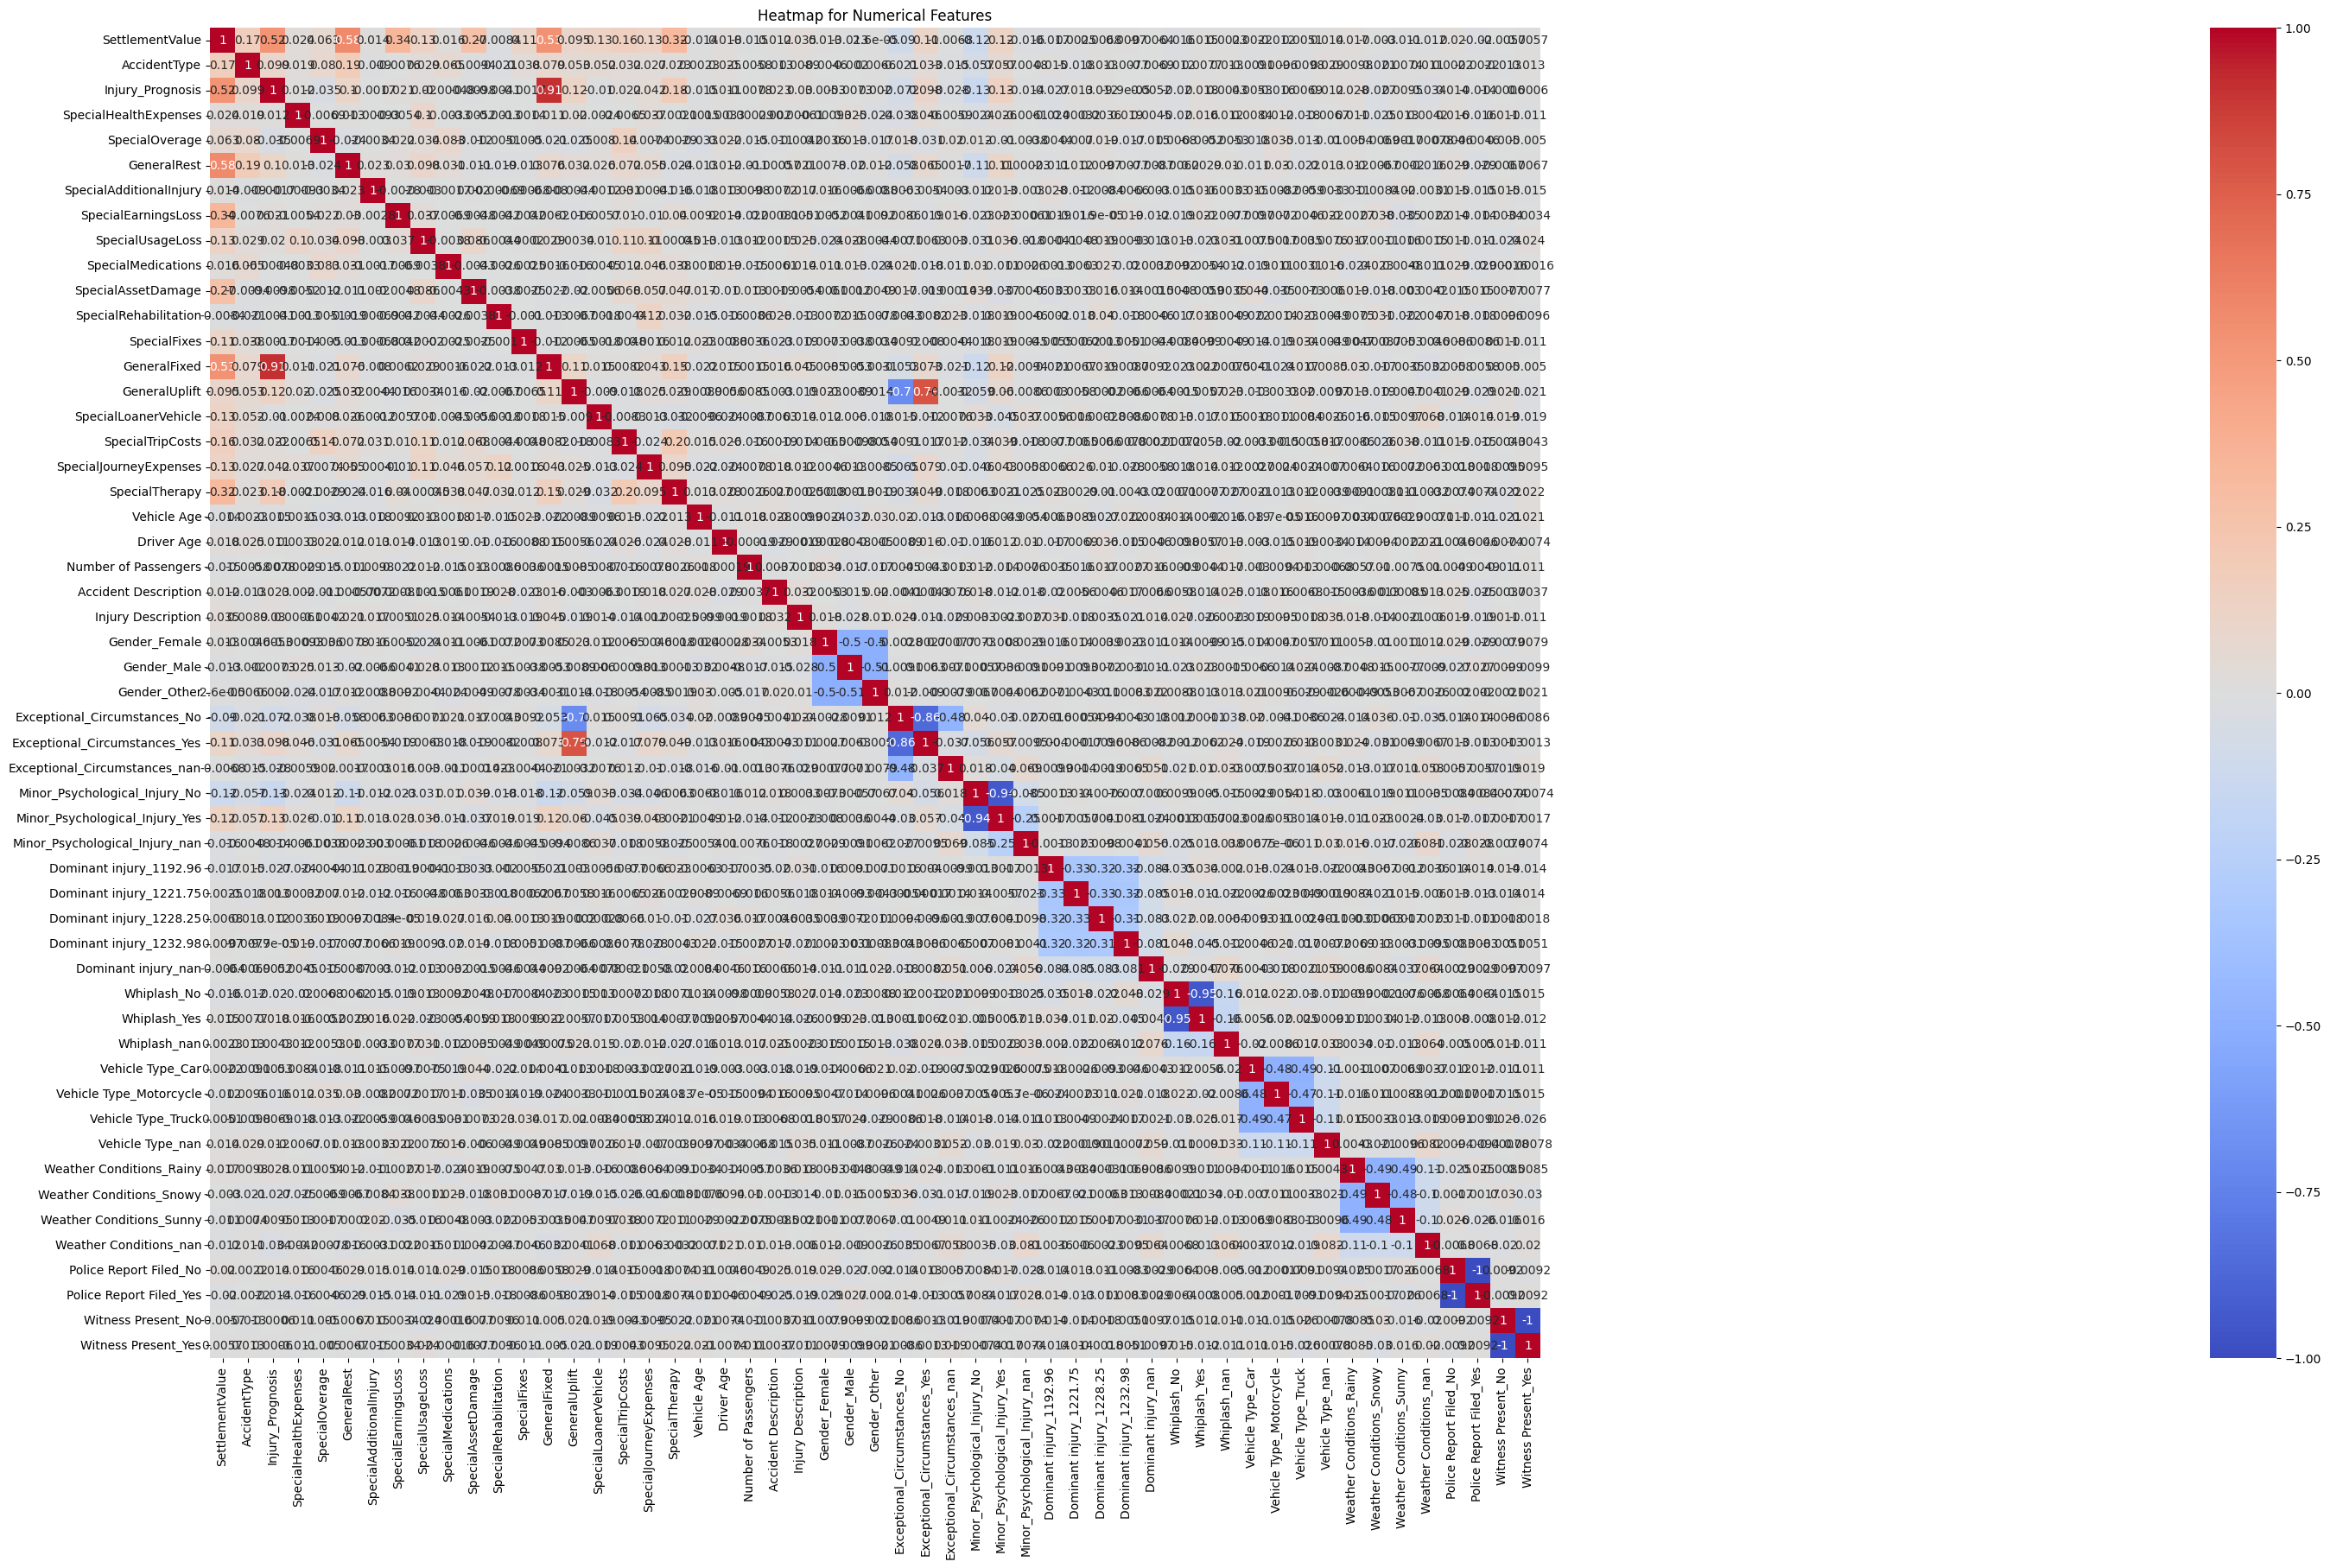

In [ ]:
## Correlation Heatmap of 
plt.figure(figsize=(200,20))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Heatmap for Numerical Features')
plt.show()

We found that the GeneralFixed and GeneralRest are highly correlated with SettlementValue. SpecialEarningLoss, SpecialTherapy and SpecialAssetDamage also shows some level of correltation. We will use other feature selection techniques to cross check the feature weightage.